In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [197]:
df = pd.read_csv('../data/cars_moldova_fixed.csv', delimiter=',')
df

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_category,Rarity_Price
0,0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,Middle mileage,Rare_Cheap
1,1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,Middle mileage,Rare_Expensive
2,2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,Middle mileage,Average rarity
3,3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,Middle mileage,Average rarity
4,4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,Middle mileage,Average rarity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,32027,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667,Middle mileage,Average rarity
32028,32028,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000,Middle mileage,Rare_Cheap
32029,32029,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714,Middle mileage,Average rarity
32030,32030,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000,High mileage,Rare_Cheap


In [198]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

In [199]:
df[cat_columns] = df[cat_columns].astype('category')

for column_name in cat_columns:
    df[column_name] = df[column_name].cat.codes

df.head()

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_category,Rarity_Price
0,0,71,532,2011,4,195000.0,1800.0,2,0,7750.0,11,17727.272727,Middle mileage,Rare_Cheap
1,1,58,356,2014,11,135000.0,1500.0,0,1,8550.0,8,16875.000000,Middle mileage,Rare_Expensive
2,2,58,415,2012,11,110000.0,1500.0,0,1,6550.0,10,11000.000000,Middle mileage,Average rarity
3,3,53,138,2006,11,200000.0,1600.0,3,1,4100.0,16,12500.000000,Middle mileage,Average rarity
4,4,47,721,2000,5,300000.0,2200.0,0,1,3490.0,22,13636.363636,Middle mileage,Average rarity


# Объявление классов регрессии

## Линейная Регрессия

In [200]:
class LinearRegression():
    def __init__(self,
                 learning_rate=0.5,
                 epochs=100,
                 weights=None,
                 bias=None,
                 batch_size=1000,
                 n_batches=None,
                 random_state=42):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = weights
        self.bias = bias
        self.seed = random_state
        self.batch_size = batch_size
        self.cost = np.zeros(epochs)

        self.n_batches = n_batches

        if not (self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias, self.weights)

    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)

    #---------------------------------
    def loss(self, yhat, y):
        return np.square(yhat - y).sum() / y.size

    #---------------------------------
    def grad_step(self, yhat, y, X):
        return 2 * np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr * self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size) / np.sqrt(weights_size)

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1 - np.sum(np.square(y - yhat)) / np.sum(np.square(y - np.mean(y)))

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias = self.init(1)

        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias, self.weights)

        self.grad = np.zeros(self.weights.shape)
        self.cost = np.zeros(self.epochs)

        if self.batch_size is None:
            self.batch_size = y.size

        if self.n_batches is None:
            self.n_batches = y.size // self.batch_size

        for i in range(self.epochs):
            loss = 0
            for cnt, (x_batch, y_batch) in enumerate(self.load_batch(X, y)):

                yhat = self.forward(x_batch)
                self.grad = self.grad_step(yhat, y_batch, x_batch)
                self.weights = self.update()
                loss += self.loss(yhat, y_batch)

                if cnt >= self.n_batches:
                    break
            self.cost[i] = loss / self.n_batches

        self.bias = self.weights[0]

    #---------------------------------
    def load_batch(self, X, y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0, y.size, self.batch_size):
            idx_batch = idxs[i_batch:i_batch + self.batch_size]
            x_batch = np.take(X, idx_batch, axis=0)
            x_batch = self.add_bias(x_batch)
            y_batch = np.take(y, idx_batch)
            yield x_batch, y_batch

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def plot_cost(self, figsize=(12, 6), title=''):
        plt.figure(figsize=figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize=24)
        plt.ylabel('Функция Потерь', fontsize=24)
        plt.title(title, fontsize=24)
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)


## Эластичная регрессия
class ElasticRegression(LinearRegression):
    def __init__(self,
                 learning_rate=0.5,
                 l1_penalty=0.0,
                 l2_penalty=0.0,
                 epochs=100,
                 weights=None,
                 bias=None,
                 batch_size=1000,
                 n_batches=None,
                 random_state=42):
        super().__init__(learning_rate=learning_rate,
                         epochs=epochs,
                         weights=weights,
                         bias=bias,
                         batch_size=batch_size,
                         n_batches=n_batches,
                         random_state=random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty

    #---------------------------------
    def loss(self, yhat, y):
        l1_term = self.l1_penalty * np.sum(self.weights[1:]) / y.size
        l2_term = (self.l2_penalty / 2) * np.sum(np.square(self.weights[1:])) / y.size
        return np.square(yhat - y).mean() + l1_term + l2_term

    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty * np.sum(self.weights[1:])
        return self.weights - self.lr * (self.grad + np.sign(self.weights) * self.l1_penalty + l2_term)

## Создание полиномов

In [201]:
def to_polynom(X, order = 2):
    order_range = range(order, order+1,1)
    out = np.copy(X)
    for i in order_range:
        out = np.hstack([out, np.power(X,i)])
    return out

## Эластичная регрессия

In [202]:
class ElasticRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty

    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term

    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty  + l2_term)

## Логическая регрессия

In [203]:
_EPS_ = 1e-6

class LogisticRegression(ElasticRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty    = 0.0,
                 l2_penalty    = 0.0,
                 epochs        = 100,
                 weights       = None,
                 bias          = None,
                 threshold     = 0.5,
                 batch_size    = 1000,
                 n_batches     = None,
                 random_state  = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         n_batches    = n_batches,
                         random_state = random_state,
                         l1_penalty = l1_penalty,
                         l2_penalty = l2_penalty)
        self.learning_rate = learning_rate/2
        self.threshold = threshold
    #---------------------------------
    def loss(self,yhat, y):

        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))

        return -(y*np.log(yhat  + _EPS_)+(1 - y)*np.log(1 - yhat  + _EPS_)).mean()\
            + l1_term+ l2_term
    #---------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    #---------------------------------
    def forward(self, X):
        return self.sigmoid(np.dot(X, self.weights))
    #---------------------------------
    def to_class(self,logit):
        return (logit>=self.threshold)*1
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return self.to_class(yhat)

    #---------------------------------
    def predict_prob(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat
    #---------------------------------
    def score(self, X, y):
        yhat  = self.predict(X)
        return sum((yhat==y)*1)/y.size
    #---------------------------------
    def plot_desicion_function(self,X,y,figsize = (12,6),
                               marker = 'o',colors =("#FF0000", '#0000FF'),
                               alpha=0.7, s = 150, poly = False, order = 2):
        plt.figure(figsize = figsize)
        cm_bright = ListedColormap(colors)
        plt.scatter(X[:, 0], X[:, 1],marker = marker, c=y, cmap=cm_bright,s = s, alpha =alpha);
        h =  (X[:, 0].max() - X[:, 0].min())/50
        x_min, x_max = X[:, 0].min()-0.5 , X[:, 0].max()+0.5
        y_min, y_max = X[:, 1].min()-0.5 , X[:, 1].max()+0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        if poly:
            Z = self.predict_prob(to_polynom(np.c_[xx.ravel(), yy.ravel()],order))-0.5
        else:
            Z = self.predict_prob(np.c_[xx.ravel(), yy.ravel()])-0.5
        cm = plt.cm.RdBu
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
        plt.xticks([],[])
        plt.yticks([],[])
        plt.tight_layout()
    #---------------------------------
    def classification_report(self, X,y):
        tp = 0 # true_positives
        tn = 0 # true_negatives
        fp = 0 # false_positives
        fn = 0 # false_negatives

        yhat  = self.predict(X)
        total = yhat.size
        n= sum(yhat==0)
        p = sum(yhat==1)

        for yhati,yi in zip(yhat,y):
            if yi == 1 and yhati == 1:
                tp += 1
            elif yi == 0 and yhati == 0:
                tn += 1
            elif yi == 1 and yhati == 0:
                fn += 1
            elif yi == 0 and yhati == 1:
                fp += 1

        print('True Positives:%.4f'%(tp/p), end = '\t')
        print('True Negatives:%.4f'%(tn/n))
        print('False Positives:%.4f'%(fp/p), end = '\t')
        print('False Negatives:%.4f'%(fn/n))
        print('Accuracy:%.4f'% ((tp + tn) / total))
        print('Recall:%.4f'% (tp / (tp + fn)), end = '\t')
        print('Precision:%.4f'%(tp / (tp + fp)))
        print('f1 measure:%.4f'%(tp / (tp + 0.5*(fp+fn))))

# Логическая регрессия

## Подготовка выборки

In [204]:
X = df[num_columns].values
y = df['Transmission'].values
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

,0,1,2,3,4
22417,0.760331,0.299930,0.576617,0.020551,0.198397
22418,0.942149,0.164488,0.328358,0.106767,0.410251
22419,0.710744,0.249925,0.303483,0.127820,0.137163
22420,0.884298,0.293929,0.351741,0.037594,0.390782
22421,0.876033,0.329933,0.318657,0.037093,0.411323


## Логическая регрессия

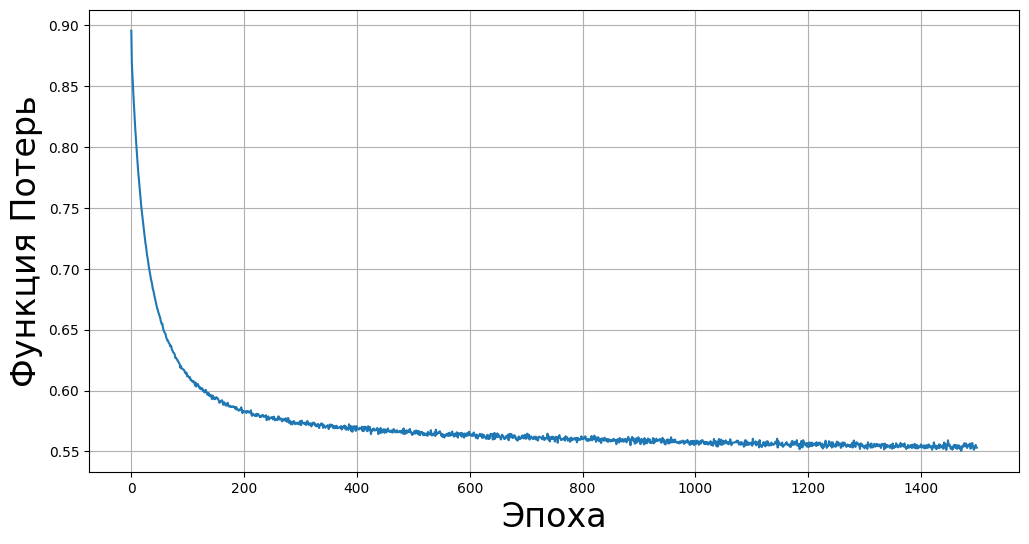

train Accuracy: 0.8055; test Accuracy: 0.8083
True Positives:0.7975	True Negatives:0.8250
False Positives:0.2025	False Negatives:0.1750
Accuracy:0.8083
Recall:0.8745	Precision:0.7975
f1 measure:0.8342


In [205]:
reg = LogisticRegression(learning_rate=0.6,epochs=1500,batch_size=5000)

reg.fit(X_train, y_train)

reg.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (reg.score(X_train, y_train), reg.score(X_test, y_test)))

reg.classification_report(X_test, y_test)

## Результаты

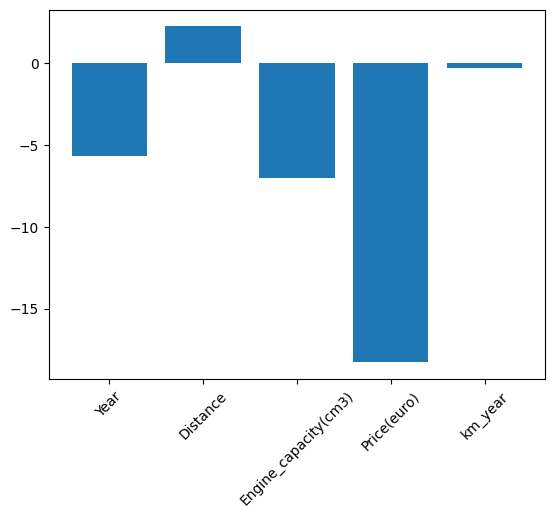

In [206]:
w, b = reg.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

# Логистическая регрессия на нормализованных данных

## Подготовка данных

In [207]:
#df_norm = pd.read_csv('../data/cars_moldova_normalisation.csv', delimiter=',')
df_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)
df_norm.head()

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_category,Rarity_Price
0,0,71,532,0.917355,4,0.194919,0.402985,2,0,0.075651,11,0.353252,Middle mileage,Rare_Cheap
1,1,58,356,0.942149,11,0.134913,0.328358,0,1,0.083667,8,0.336172,Middle mileage,Rare_Expensive
2,2,58,415,0.925620,11,0.109911,0.328358,0,1,0.063627,10,0.218437,Middle mileage,Average rarity
3,3,53,138,0.876033,11,0.199920,0.353234,3,1,0.039078,16,0.248497,Middle mileage,Average rarity
4,4,47,721,0.826446,5,0.299930,0.502488,0,1,0.032966,22,0.271270,Middle mileage,Average rarity


In [208]:
X1 = df_norm[num_columns].values
y1 = df_norm["Transmission"].values
features_names = df_norm[num_columns].columns

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test  = scaler.transform(X1_test)
pd.DataFrame(X1_train).tail()

,0,1,2,3,4
22417,0.760331,0.299930,0.576617,0.020551,0.198397
22418,0.942149,0.164488,0.328358,0.106767,0.410251
22419,0.710744,0.249925,0.303483,0.127820,0.137163
22420,0.884298,0.293929,0.351741,0.037594,0.390782
22421,0.876033,0.329933,0.318657,0.037093,0.411323


## Логическая регрессия

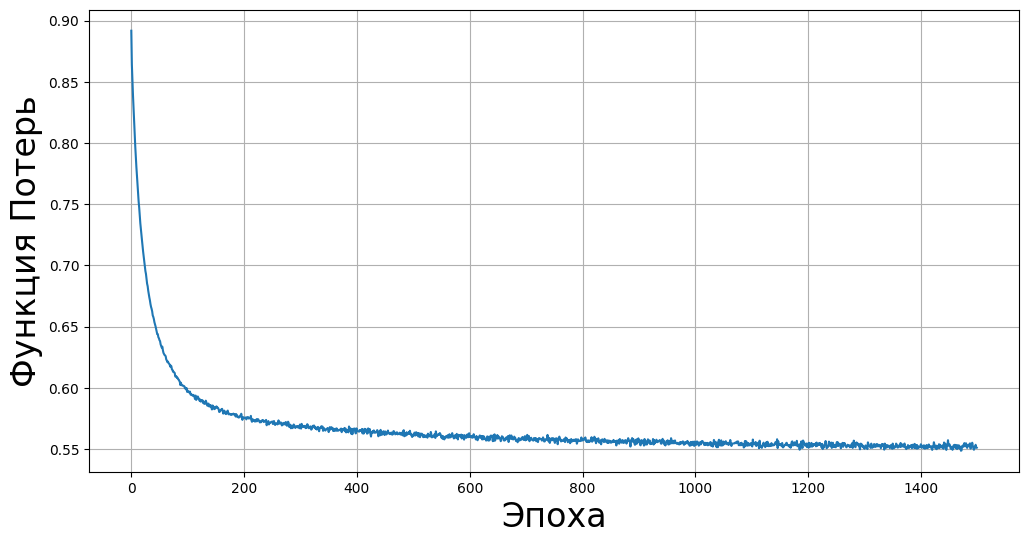

train Accuracy: 0.8067; test Accuracy: 0.8101
True Positives:0.7982	True Negatives:0.8283
False Positives:0.2018	False Negatives:0.1717
Accuracy:0.8101
Recall:0.8773	Precision:0.7982
f1 measure:0.8359


In [209]:
reg = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

reg.fit(X1_train, y1_train)

reg.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (reg.score(X1_train, y1_train), reg.score(X1_test, y1_test)))

reg.classification_report(X1_test, y1_test)

## Результаты

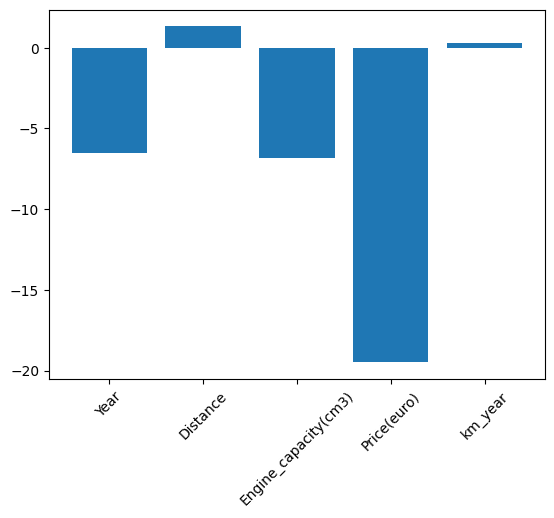

In [210]:
w, b = reg.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

# Логическая регрессия на стандартизированных данных

## Подготовка данных

In [211]:
df_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
df_scaled[num_columns] = (df[num_columns]-M)/STD

df_scaled.head()

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_category,Rarity_Price
0,0,71,532,0.366932,4,0.126972,-0.083235,2,0,-0.169407,11,0.375933,Middle mileage,Rare_Cheap
1,1,58,356,0.761088,11,-0.491797,-0.614249,0,1,-0.082759,8,0.260056,Middle mileage,Rare_Expensive
2,2,58,415,0.498318,11,-0.749617,-0.614249,0,1,-0.299379,10,-0.538724,Middle mileage,Average rarity
3,3,53,138,-0.289993,11,0.178536,-0.437244,3,1,-0.564738,16,-0.334780,Middle mileage,Average rarity
4,4,47,721,-1.078304,5,1.209817,0.624784,0,1,-0.630807,22,-0.180277,Middle mileage,Average rarity


In [212]:
X2 = df_scaled[num_columns].values
y2 = df_scaled["Transmission"].values
features_names = df_scaled[num_columns].columns

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test  = scaler.transform(X2_test)
pd.DataFrame(X2_train).tail()

,0,1,2,3,4
22417,0.760331,0.299930,0.576617,0.020551,0.198397
22418,0.942149,0.164488,0.328358,0.106767,0.410251
22419,0.710744,0.249925,0.303483,0.127820,0.137163
22420,0.884298,0.293929,0.351741,0.037594,0.390782
22421,0.876033,0.329933,0.318657,0.037093,0.411323


## Логическая регрессия

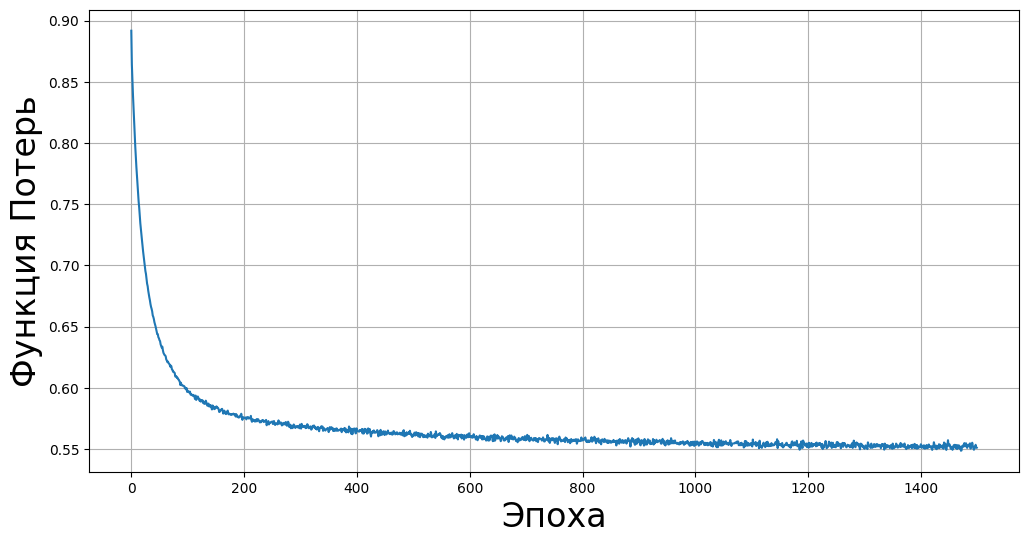

train Accuracy: 0.8067; test Accuracy: 0.8101
True Positives:0.7982	True Negatives:0.8283
False Positives:0.2018	False Negatives:0.1717
Accuracy:0.8101
Recall:0.8773	Precision:0.7982
f1 measure:0.8359


In [213]:
reg = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

reg.fit(X2_train, y2_train)

reg.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (reg.score(X2_train, y1_train), reg.score(X2_test, y2_test)))

reg.classification_report(X2_test, y2_test)

## Результаты

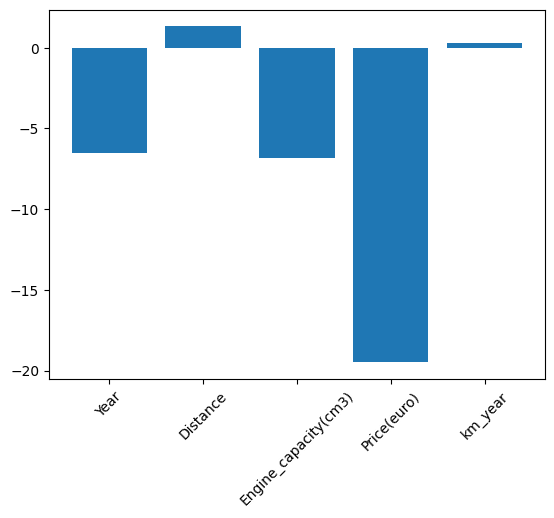

In [214]:
w, b = reg.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

# __Вывод__:
Предварительное изменение данных не оказала большого влияния на результат.

# Логическая регрессия на категориальных данных

## Подготовка данных

In [215]:
df_dum = pd.read_csv('../data/cars_moldova_ohe.csv', delimiter=',')
df_dum.head()

,Unnamed: 0,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,Make_ARO,Make_Abarth,Make_Acura,...,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,Distance_category_High mileage,Distance_category_Middle mileage,Rarity_Price_Average rarity,Rarity_Price_Rare_Cheap,Rarity_Price_Rare_Expensive
0,0,2011,195000.0,1800.0,7750.0,11,17727.272727,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,1,2014,135000.0,1500.0,8550.0,8,16875.000000,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2,2012,110000.0,1500.0,6550.0,10,11000.000000,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,3,2006,200000.0,1600.0,4100.0,16,12500.000000,0,0,0,...,1,0,0,0,1,0,1,1,0,0
4,4,2000,300000.0,2200.0,3490.0,22,13636.363636,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [216]:
df_dum['Year'] = df_norm['Year']
df_dum['Distance'] = df_norm['Distance']
df_dum['Engine_capacity(cm3)'] = df_norm['Engine_capacity(cm3)']
df_dum['Price(euro)'] = df_norm['Price(euro)']
df_dum['km_year'] = df_norm['km_year']
df_dum

,Unnamed: 0,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,Make_ARO,Make_Abarth,Make_Acura,...,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,Distance_category_High mileage,Distance_category_Middle mileage,Rarity_Price_Average rarity,Rarity_Price_Rare_Cheap,Rarity_Price_Rare_Expensive
0,0,0.917355,0.194919,0.402985,0.075651,11,0.353252,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,1,0.942149,0.134913,0.328358,0.083667,8,0.336172,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2,0.925620,0.109911,0.328358,0.063627,10,0.218437,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,3,0.876033,0.199920,0.353234,0.039078,16,0.248497,0,0,0,...,1,0,0,0,1,0,1,1,0,0
4,4,0.826446,0.299930,0.502488,0.032966,22,0.271270,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,32027,0.958678,0.087909,0.402985,0.113226,6,0.291917,0,0,0,...,0,1,0,1,0,0,1,1,0,0
32028,32028,0.842975,0.224922,0.402985,0.042084,20,0.223447,0,0,0,...,1,0,0,0,1,0,1,0,1,0
32029,32029,0.950413,0.088909,0.328358,0.068136,7,0.252791,0,0,0,...,0,0,0,0,1,0,1,1,0,0
32030,32030,0.876033,0.369937,0.452736,0.038076,16,0.461423,0,0,0,...,0,0,0,0,1,1,0,0,1,0


X,y = df_dum.drop(columns = ['Transmission']).values,df_dum['Transmission'].values
features_names = df_dum.drop(columns = ['Transmission']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
pd.DataFrame(X_train).tail()

## Логическая регрессия

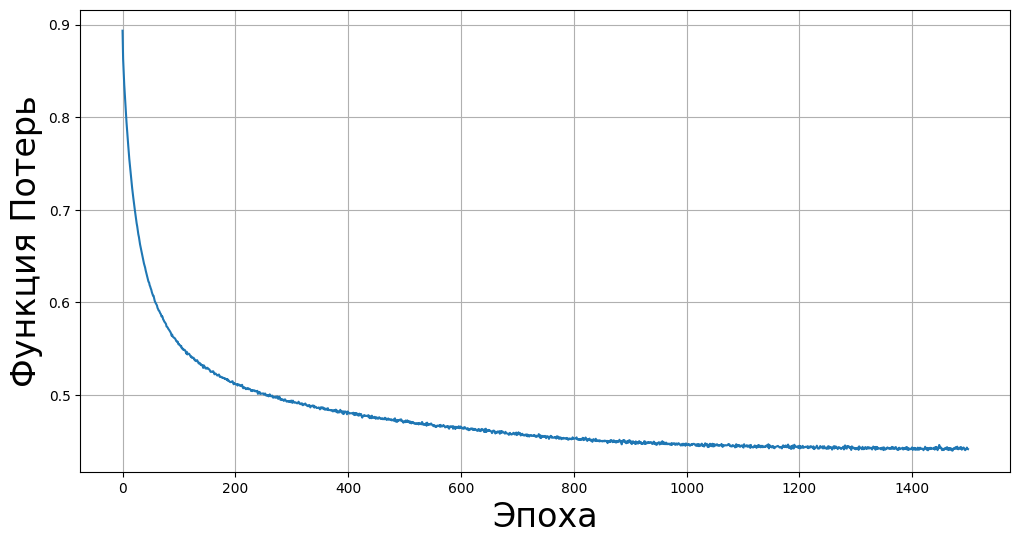

train Accuracy: 0.7982; test Accuracy: 0.8040
True Positives:0.7742	True Negatives:0.8587
False Positives:0.2258	False Negatives:0.1413
Accuracy:0.8040
Recall:0.9098	Precision:0.7742
f1 measure:0.8365


In [217]:
reg = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l1_penalty = 0.008, l2_penalty = 0.00005)

reg.fit(X_train, y_train)

reg.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (reg.score(X_train, y_train), reg.score(X_test, y_test)))

reg.classification_report(X_test, y_test)

## Результаты

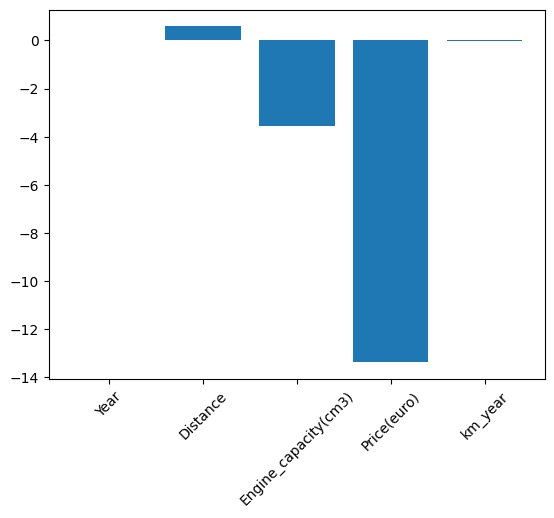

In [218]:
w, b = reg.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

## __Вывод__:
Классификация улучшилась засчет параметров precision, accuracy, recall. Самыми значимыми признаками были числовые.
В итоге, засчет добавления категориальных признаков легче становится отслеживать зависимости.

# __Анализ весов__:
Самыми большими весами обладают данные Engine_capacity и Price. Большим весом также обладает год производства, чем новее машина, тем она дороже.
Засчет соотношения категорий типа передач и объема двигателя - можно прийти к выводу, что есть корреляция между ценой и двумя этими показателями.